In [1]:
import os
from os import path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import PIL

### Data preprocessing

In [2]:
data_dir = '../../data/v_0.1/'
train_dataset = path.join(data_dir, 'fixed_train.csv')
valid_dataset = path.join(data_dir, 'fixed_valid.csv')
test_dataset = path.join(data_dir, 'fixed_test.csv')

cols = [i for i in range(1025)]

train_df = pd.read_csv(train_dataset, header=0, names=cols)
valid_df = pd.read_csv(valid_dataset, header=0, names=cols)
test_df = pd.read_csv(test_dataset, header=0, names=cols)

In [3]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X = train_df.iloc[:, 1:]
y = train_df.iloc[:, :1]

X_test = test_df.iloc[:, 1:]
y_test = test_df.iloc[:, :1]

X_valid = valid_df.iloc[:, 1:]
y_valid = valid_df.iloc[:, :1]

In [5]:
X.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
X.shape

(17235, 1024)

In [7]:
y.values[4000]

array([20])

In [8]:
X.values[0]

array([0, 0, 0, ..., 0, 0, 0])

In [3]:
!ls

classifier.ipynb    svm_model.ipynb     test_data.csv
dataset_iterator.py svm_model_1.sav     testt.jpg


In [6]:
img = PIL.Image.open('testt.png')

In [8]:
pix = np.array(img)
#image_grayscale = pix.mean(axis=2).astype(np.float32)
image_grayscale.shape

AttributeError: shape

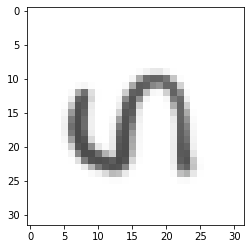

In [7]:
plt.imshow(img)

In [17]:
img_32 = np.reshape(image_grayscale, (32, 32))

ValueError: cannot reshape array of size 90000 into shape (32,32)

## Extracting out the image dataset from binary values

In [1]:
import scipy.ndimage as ndimage

def rotate_flip_and_save(img_np, name, label):
    angle = 270 
    data = np.reshape(img_np, (32,32))

    new_data = ndimage.rotate(data, angle, reshape=True)
    new_data = np.fliplr(new_data)
    
    plt.imshow(new_data, cmap='gray')
    plt.savefig(f'train_data/{label}/{name}.png')

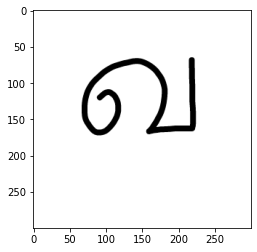

In [11]:
import scipy.ndimage as ndimage

def rotate_flip_and_save(img_np):
    angle = 270 
    data = np.reshape(img_np, (32,32))
    data = img_np

    new_data = ndimage.rotate(data, angle, reshape=True)
    new_data = np.fliplr(new_data)
    
    plt.imshow(new_data, cmap='gray')

img = PIL.Image.open('13_fh.png')
img_np = np.array(img)
rotate_flip_and_save(img_np)

In [158]:
for i in range(1, 86):
    directory = str(i)
    parent_directory = 'train_data/'
    d = path.join(parent_directory, directory)
    os.mkdir(d) 

In [160]:
dict_train_50 = {}

for label in range(1, 86):
    count = 0
    dict_train_50[label] = []
    for row in train_df.values:
        if row[0]==label and count<1:
            dict_train_50[label].append(row[1:])
            count+=1

In [164]:
for label in dict_train_50.keys():
    for i in range(1):
        row = dict_train_50[label][i]
        rotate_flip_and_save(row, i+1 ,label)

### Training and fitting the model

In [9]:
y.head()

,1
0,1
1,1
2,1
3,1
4,1


In [5]:
y = np.array(y[0].tolist())

In [11]:
print(y)

[ 1  1  1 ... 85 85 85]


In [6]:
from sklearn import svm

clf = svm.SVC(kernel='linear', gamma=0.7, C=1.0, max_iter=50, verbose=True)

In [7]:
clf.fit(X, y)

[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.103255, rho = 0.023444
nSV = 40, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.071214, rho = 0.528895
nSV = 45, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.063470, rho = 0.448972
nSV = 46, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.086075, rho = 0.176699
nSV = 45, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.074054, rho = 0.154272
nSV = 46, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.131937, rho = 0.626403
nSV = 45, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.062914, rho = -0.396699
nSV = 44, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.076445, rho = -0.140742
nSV = 48, nBSV = 0
WARN: libsvm S

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.056131, rho = 0.060113
nSV = 50, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.072614, rho = 0.193449
nSV = 52, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.110026, rho = -0.235840
nSV = 51, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.076659, rho = -0.169093
nSV = 49, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.071347, rho = -0.155223
nSV = 52, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.069012, rho = -0.048638
nSV = 48, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.058392, rho = 0.265182
nSV = 40, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.055681, rho = -0.129824
nSV = 50, nBSV = 0
WARN: libsvm Solver

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.083281, rho = -0.566272
nSV = 53, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.085958, rho = -0.452486
nSV = 49, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.101470, rho = -0.591710
nSV = 60, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.087593, rho = -0.370500
nSV = 54, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.094869, rho = -0.365713
nSV = 58, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.115430, rho = -0.736956
nSV = 58, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.068394, rho = -0.656400
nSV = 49, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.076161, rho = -0.707494
nSV = 50, nBSV = 0
WARN: libsvm Sol

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.068495, rho = -0.599455
nSV = 53, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.077192, rho = -0.791508
nSV = 49, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.115719, rho = -0.603977
nSV = 55, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.062344, rho = -0.828710
nSV = 43, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.074592, rho = -0.392110
nSV = 54, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.075210, rho = -0.426501
nSV = 55, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.085021, rho = -0.628768
nSV = 49, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.078206, rho = -0.863890
nSV = 52, nBSV = 0
WARN: libsvm Sol

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.072274, rho = -0.250033
nSV = 51, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.054362, rho = -0.237504
nSV = 43, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.073867, rho = 0.253930
nSV = 47, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.082446, rho = 0.033325
nSV = 59, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.076044, rho = -0.065990
nSV = 58, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.173579, rho = 0.189267
nSV = 64, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.193330, rho = -0.835857
nSV = 61, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.117757, rho = -0.366345
nSV = 63, nBSV = 0
WARN: libsvm Solver

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.063789, rho = 0.077492
nSV = 44, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.161657, rho = 0.064069
nSV = 60, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.213577, rho = 0.394308
nSV = 67, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.145401, rho = 0.222051
nSV = 65, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.097901, rho = 0.096670
nSV = 59, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.098877, rho = -0.115609
nSV = 58, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.230917, rho = 0.595585
nSV = 75, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.089715, rho = -0.029545
nSV = 57, nBSV = 0
WARN: libsvm Solver re

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.194968, rho = 0.327435
nSV = 67, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.247028, rho = 0.285472
nSV = 65, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.281003, rho = 0.105626
nSV = 74, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.228397, rho = -0.051734
nSV = 68, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.281588, rho = 0.325604
nSV = 74, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.083057, rho = -0.401580
nSV = 58, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.153152, rho = -0.348756
nSV = 68, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.075894, rho = -0.501093
nSV = 59, nBSV = 0
WARN: libsvm Solver 

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.130459, rho = 0.254447
nSV = 64, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.084869, rho = 0.808706
nSV = 58, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.099067, rho = 0.634218
nSV = 57, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.072931, rho = 0.602047
nSV = 55, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.071856, rho = 0.488117
nSV = 46, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.086949, rho = 0.507178
nSV = 62, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.096474, rho = 0.451653
nSV = 59, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.057917, rho = 0.239754
nSV = 54, nBSV = 0
WARN: libsvm Solver reac

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.093823, rho = 0.192212
nSV = 59, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.059217, rho = 0.083208
nSV = 59, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.082118, rho = 0.315529
nSV = 59, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.061676, rho = 0.047441
nSV = 53, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.088593, rho = 0.157628
nSV = 60, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.056315, rho = -0.017940
nSV = 53, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.121871, rho = 0.829708
nSV = 57, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.081802, rho = 0.518548
nSV = 59, nBSV = 0
WARN: libsvm Solver rea

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.110138, rho = -0.731268
nSV = 58, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.207616, rho = -0.502351
nSV = 63, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.120240, rho = -0.748850
nSV = 59, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.132893, rho = 0.160100
nSV = 64, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.127371, rho = -0.184996
nSV = 57, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.165982, rho = -1.041422
nSV = 69, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.192786, rho = -0.953828
nSV = 77, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.115303, rho = -0.388573
nSV = 64, nBSV = 0
WARN: libsvm Solv

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.105268, rho = 0.015669
nSV = 55, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.232109, rho = -0.219548
nSV = 77, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.160408, rho = -0.188233
nSV = 77, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.172770, rho = -0.184159
nSV = 71, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.082147, rho = 0.262356
nSV = 60, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.053929, rho = -0.289606
nSV = 50, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.182538, rho = 0.412594
nSV = 71, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.128267, rho = 0.171687
nSV = 67, nBSV = 0
WARN: libsvm Solver 

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.107800, rho = 0.269599
nSV = 65, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.184387, rho = -0.317145
nSV = 70, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.065894, rho = 0.194546
nSV = 52, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.072756, rho = -0.154441
nSV = 57, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.173492, rho = -0.518962
nSV = 75, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.138687, rho = -0.203746
nSV = 69, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.208195, rho = -0.640903
nSV = 72, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.075708, rho = -0.059186
nSV = 58, nBSV = 0
WARN: libsvm Solve

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.093298, rho = -0.379414
nSV = 63, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.234628, rho = 0.017556
nSV = 74, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.109255, rho = -0.473678
nSV = 59, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.119931, rho = 0.229978
nSV = 61, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.095749, rho = -0.157372
nSV = 63, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.113269, rho = -0.175833
nSV = 62, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.115739, rho = -0.625386
nSV = 64, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.178863, rho = -0.163320
nSV = 64, nBSV = 0
WARN: libsvm Solve

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.247270, rho = -0.141732
nSV = 69, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.090115, rho = -0.524415
nSV = 47, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.102979, rho = 0.183862
nSV = 54, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.079772, rho = -0.068327
nSV = 60, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.078716, rho = -0.291074
nSV = 56, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.081517, rho = -0.461489
nSV = 58, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.162182, rho = -0.441645
nSV = 62, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.087735, rho = -0.304795
nSV = 60, nBSV = 0
WARN: libsvm Solv

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.092655, rho = -0.205817
nSV = 66, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.077482, rho = -0.482450
nSV = 61, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.081367, rho = -0.469961
nSV = 55, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.106122, rho = -0.163759
nSV = 56, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.077686, rho = -0.386179
nSV = 58, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.080094, rho = -0.201420
nSV = 54, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.076511, rho = 0.182314
nSV = 52, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.103297, rho = 0.118037
nSV = 61, nBSV = 0
WARN: libsvm Solve

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.134264, rho = -0.125064
nSV = 66, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.100407, rho = -0.162201
nSV = 64, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.085622, rho = -0.550760
nSV = 57, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.191250, rho = -0.257437
nSV = 75, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.078913, rho = -0.606656
nSV = 53, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.068757, rho = -0.345529
nSV = 45, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.101762, rho = -0.105835
nSV = 58, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.096438, rho = 0.107410
nSV = 64, nBSV = 0
WARN: libsvm Solv

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.181403, rho = -0.189688
nSV = 75, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.124557, rho = -0.106009
nSV = 69, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.179750, rho = -0.345936
nSV = 70, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.271992, rho = -0.319700
nSV = 77, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.157225, rho = -0.171983
nSV = 65, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.270099, rho = 0.114019
nSV = 77, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.187551, rho = 0.233784
nSV = 72, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.184794, rho = 0.531272
nSV = 71, nBSV = 0
WARN: libsvm Solver

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.097336, rho = 0.358751
nSV = 57, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.122520, rho = 0.591072
nSV = 61, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.145981, rho = 0.669396
nSV = 63, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.173633, rho = 0.674678
nSV = 66, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.120894, rho = 0.362378
nSV = 62, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.198678, rho = 0.623045
nSV = 71, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.124705, rho = -0.241646
nSV = 67, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.196119, rho = 0.208263
nSV = 80, nBSV = 0
WARN: libsvm Solver rea

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.282363, rho = 0.518675
nSV = 85, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.564606, rho = -0.380814
nSV = 94, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.181542, rho = -0.232771
nSV = 78, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.170036, rho = 0.473392
nSV = 69, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.159897, rho = 0.399938
nSV = 72, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.104921, rho = 0.107778
nSV = 64, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.109349, rho = 0.378567
nSV = 62, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.146733, rho = 0.190510
nSV = 68, nBSV = 0
WARN: libsvm Solver re

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.102916, rho = -0.189681
nSV = 57, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.112405, rho = 0.026114
nSV = 61, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.102346, rho = -0.177457
nSV = 62, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.323230, rho = 1.345822
nSV = 79, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.394347, rho = 0.569553
nSV = 79, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.231971, rho = -0.702450
nSV = 71, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.180327, rho = 0.084647
nSV = 77, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.208816, rho = 0.157735
nSV = 75, nBSV = 0
WARN: libsvm Solver r

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.090662, rho = -0.826674
nSV = 61, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.096205, rho = -0.411553
nSV = 58, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.049801, rho = -0.712590
nSV = 44, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.314854, rho = -0.289424
nSV = 70, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.173991, rho = -0.445112
nSV = 68, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.105081, rho = -0.514243
nSV = 64, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.094814, rho = -0.727451
nSV = 62, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.158759, rho = -0.587097
nSV = 60, nBSV = 0
WARN: libsvm Sol

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.171817, rho = 0.376422
nSV = 68, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.138837, rho = -0.021405
nSV = 62, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.131432, rho = 0.337878
nSV = 58, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.100335, rho = 0.130705
nSV = 61, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.095430, rho = 0.634853
nSV = 56, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.105634, rho = 0.366166
nSV = 59, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.130857, rho = 0.506065
nSV = 65, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.227939, rho = 0.115816
nSV = 70, nBSV = 0
WARN: libsvm Solver rea

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.077795, rho = -0.267025
nSV = 56, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.084969, rho = -0.258817
nSV = 54, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.083521, rho = -0.448763
nSV = 56, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.090970, rho = -0.659342
nSV = 59, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.059648, rho = -0.463716
nSV = 50, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.142569, rho = -0.428138
nSV = 61, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.064517, rho = -0.472941
nSV = 51, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.069888, rho = -0.394093
nSV = 54, nBSV = 0
WARN: libsvm Sol

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.122983, rho = -0.137395
nSV = 63, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.108078, rho = 0.380063
nSV = 64, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.118254, rho = 0.236822
nSV = 66, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.074357, rho = 0.274350
nSV = 60, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.099462, rho = 0.334401
nSV = 61, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.067335, rho = 0.573386
nSV = 55, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.100782, rho = 0.712472
nSV = 66, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.115361, rho = 0.321745
nSV = 70, nBSV = 0
WARN: libsvm Solver rea

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.113630, rho = 0.682736
nSV = 63, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.093227, rho = 0.814894
nSV = 59, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.087186, rho = 1.001161
nSV = 59, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.079063, rho = 0.700848
nSV = 54, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.090943, rho = 0.723995
nSV = 60, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.085064, rho = 0.874755
nSV = 59, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.159018, rho = 0.267205
nSV = 70, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.192607, rho = 0.534563
nSV = 73, nBSV = 0
WARN: libsvm Solver reac

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.088903, rho = 0.085748
nSV = 62, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.087277, rho = 0.281519
nSV = 63, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.067575, rho = 0.319170
nSV = 58, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.075242, rho = 0.417008
nSV = 64, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.083310, rho = 0.541958
nSV = 60, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.053524, rho = 0.697555
nSV = 52, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.052320, rho = 0.675835
nSV = 47, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.045761, rho = 0.645511
nSV = 42, nBSV = 0
WARN: libsvm Solver reac

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.044168, rho = 0.711611
nSV = 44, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.050667, rho = 0.604078
nSV = 44, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.042445, rho = 0.697764
nSV = 43, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.053950, rho = 0.729272
nSV = 43, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.049013, rho = 0.279250
nSV = 50, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.076782, rho = 0.684507
nSV = 58, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.079802, rho = 0.077821
nSV = 52, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.056564, rho = 0.255382
nSV = 49, nBSV = 0
WARN: libsvm Solver reac

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.086634, rho = -0.220233
nSV = 57, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.162198, rho = 0.867154
nSV = 67, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.415867, rho = 0.334399
nSV = 78, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.147743, rho = 0.281267
nSV = 66, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.084842, rho = 0.159514
nSV = 59, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.087316, rho = -0.386094
nSV = 61, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.177198, rho = 0.004075
nSV = 68, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.069794, rho = -0.394834
nSV = 51, nBSV = 0
WARN: libsvm Solver r

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.099890, rho = 0.378560
nSV = 60, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.221633, rho = 0.214715
nSV = 75, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.273455, rho = 0.003385
nSV = 80, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.060075, rho = 0.275328
nSV = 54, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.411681, rho = 0.195695
nSV = 76, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.159562, rho = -0.034990
nSV = 67, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.281405, rho = -0.239909
nSV = 79, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.136965, rho = 0.294502
nSV = 65, nBSV = 0
WARN: libsvm Solver re

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.096540, rho = 0.187334
nSV = 58, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.207367, rho = -0.637523
nSV = 68, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.241799, rho = -0.211589
nSV = 73, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.138886, rho = -0.498332
nSV = 60, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.080765, rho = 0.138275
nSV = 50, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.183618, rho = 0.584481
nSV = 69, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.136161, rho = 0.680894
nSV = 57, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.115507, rho = 0.563416
nSV = 58, nBSV = 0
WARN: libsvm Solver r

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.052606, rho = -0.046863
nSV = 51, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.099585, rho = 0.689011
nSV = 61, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.083183, rho = 0.399356
nSV = 52, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.098119, rho = -0.369386
nSV = 59, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.118490, rho = 0.010557
nSV = 68, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.080697, rho = 0.069518
nSV = 55, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.076974, rho = 0.391042
nSV = 57, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.157861, rho = 0.172767
nSV = 62, nBSV = 0
WARN: libsvm Solver re

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.131760, rho = 0.255830
nSV = 62, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.123945, rho = 0.351467
nSV = 62, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.061314, rho = 0.270413
nSV = 51, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.206502, rho = 0.222745
nSV = 63, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.090181, rho = 0.006201
nSV = 61, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.106880, rho = -0.173119
nSV = 57, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.088464, rho = 0.240200
nSV = 57, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.195777, rho = -0.801148
nSV = 67, nBSV = 0
WARN: libsvm Solver re

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.220038, rho = -0.321429
nSV = 68, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.092416, rho = -0.575360
nSV = 63, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.109404, rho = -0.721561
nSV = 63, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.145001, rho = -0.063008
nSV = 65, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.159118, rho = -0.201219
nSV = 65, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.109598, rho = -0.282851
nSV = 60, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.085700, rho = -0.148168
nSV = 56, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.107567, rho = -0.476152
nSV = 56, nBSV = 0
WARN: libsvm Sol

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.166795, rho = -0.262299
nSV = 66, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.160548, rho = 0.286480
nSV = 72, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.122557, rho = -0.092550
nSV = 58, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.081930, rho = 0.311132
nSV = 57, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.096459, rho = 0.507460
nSV = 58, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.161126, rho = 0.441150
nSV = 66, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.307051, rho = 0.544237
nSV = 71, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.121398, rho = 0.263014
nSV = 59, nBSV = 0
WARN: libsvm Solver re

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.148662, rho = 0.513036
nSV = 66, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.119323, rho = 0.397827
nSV = 60, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.324036, rho = 1.080210
nSV = 77, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.276722, rho = 0.373166
nSV = 78, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.353527, rho = 0.542294
nSV = 82, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.305870, rho = 0.182018
nSV = 74, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.200591, rho = 0.493141
nSV = 69, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.144917, rho = 0.794618
nSV = 64, nBSV = 0
WARN: libsvm Solver reac

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.123846, rho = 0.123883
nSV = 50, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.139924, rho = -0.397963
nSV = 53, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.084644, rho = 0.161887
nSV = 55, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.095682, rho = -0.162991
nSV = 44, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.081977, rho = 0.436956
nSV = 46, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.058153, rho = 0.563189
nSV = 51, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.070415, rho = 0.419020
nSV = 50, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.079616, rho = 0.314272
nSV = 48, nBSV = 0
WARN: libsvm Solver re

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.108814, rho = -0.500991
nSV = 66, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.152926, rho = -0.034557
nSV = 64, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.145889, rho = -0.126556
nSV = 70, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.089408, rho = -0.201002
nSV = 63, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.254460, rho = -0.114136
nSV = 77, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.094992, rho = -0.176114
nSV = 64, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.122836, rho = -0.564027
nSV = 67, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.077194, rho = -0.310299
nSV = 58, nBSV = 0
WARN: libsvm Sol

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.098581, rho = -0.420612
nSV = 56, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.163318, rho = -0.457240
nSV = 62, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.100952, rho = -0.454517
nSV = 54, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.330070, rho = 0.503628
nSV = 72, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.439762, rho = 0.250760
nSV = 77, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.212509, rho = -1.435394
nSV = 72, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.165995, rho = -0.561318
nSV = 74, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.147426, rho = -0.094334
nSV = 65, nBSV = 0
WARN: libsvm Solve

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.245628, rho = -0.145245
nSV = 76, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.153706, rho = -0.296355
nSV = 69, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.322582, rho = 1.374049
nSV = 71, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.086402, rho = 0.453674
nSV = 54, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.182785, rho = 0.891117
nSV = 65, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.260895, rho = 0.266970
nSV = 67, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.168204, rho = 0.472039
nSV = 61, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.191541, rho = 0.801562
nSV = 68, nBSV = 0
WARN: libsvm Solver re

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.098755, rho = -0.603360
nSV = 62, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.074840, rho = -0.432115
nSV = 59, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.181474, rho = -0.536144
nSV = 69, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.102212, rho = -0.751353
nSV = 65, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.070639, rho = -0.563690
nSV = 57, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.107903, rho = -0.485552
nSV = 58, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.078376, rho = -0.631645
nSV = 51, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.095833, rho = -0.480167
nSV = 58, nBSV = 0
WARN: libsvm Sol

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.227276, rho = -0.569569
nSV = 79, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.124430, rho = -0.682914
nSV = 62, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.107153, rho = -0.630453
nSV = 63, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.201176, rho = -0.147659
nSV = 72, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.176640, rho = -0.418288
nSV = 64, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.096555, rho = -0.334731
nSV = 61, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.101370, rho = -0.202440
nSV = 60, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.135422, rho = -0.243734
nSV = 63, nBSV = 0
WARN: libsvm Sol

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.219503, rho = -0.585420
nSV = 82, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.266751, rho = 0.552314
nSV = 81, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.272119, rho = 0.177521
nSV = 86, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.193224, rho = -0.216468
nSV = 82, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.104600, rho = 0.045143
nSV = 68, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.195917, rho = -0.078491
nSV = 79, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.176774, rho = -0.457769
nSV = 74, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.166189, rho = -0.603219
nSV = 75, nBSV = 0
WARN: libsvm Solver

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.182539, rho = -0.029094
nSV = 71, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.088858, rho = -0.345511
nSV = 62, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.120649, rho = -0.454515
nSV = 64, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.086976, rho = -0.483321
nSV = 59, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.426119, rho = 0.599991
nSV = 89, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.276936, rho = 0.041189
nSV = 79, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.150207, rho = -1.111227
nSV = 65, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.441203, rho = -0.895901
nSV = 85, nBSV = 0
WARN: libsvm Solve

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.248719, rho = 0.002091
nSV = 73, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.152654, rho = 0.544684
nSV = 72, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.201446, rho = 0.546844
nSV = 68, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.100176, rho = -0.647021
nSV = 63, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.137838, rho = -0.377813
nSV = 69, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.095027, rho = 0.033583
nSV = 64, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.111664, rho = -0.149285
nSV = 66, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.139704, rho = -0.027745
nSV = 69, nBSV = 0
WARN: libsvm Solver 

WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.055384, rho = 0.577750
nSV = 50, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.055395, rho = 0.589524
nSV = 48, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.046167, rho = 0.564189
nSV = 45, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.433071, rho = -0.241780
nSV = 81, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.176620, rho = -1.925629
nSV = 70, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.235356, rho = -1.387708
nSV = 78, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.392963, rho = -0.964681
nSV = 88, nBSV = 0
WARN: libsvm Solver reached max_iter
optimization finished, #iter = 50
obj = -0.168489, rho = -0.436446
nSV = 72, nBSV = 0
WARN: libsvm Solver

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


SVC(gamma=0.7, kernel='linear', max_iter=50, verbose=True)

In [8]:
clf.score(X,y)

0.9889759210908036

In [11]:
y_preds = clf.predict(X_test)

y_test_list = y_test[0].tolist()
y_preds_list = list(y_preds)

In [12]:
pred_acc_list = []

for pred_class, true_class in zip(y_preds_list, y_test_list):
    pred_acc_list.append(int(pred_class==true_class))

accuracy = sum(pred_acc_list) / float(len(pred_acc_list)) * 100

In [13]:
print(f'Accuracy: {round(accuracy, 2)}%')

Accuracy: 72.67%


In [14]:
import pickle
filename = 'model_v1.sav'
pickle.dump(clf, open(filename, 'wb'))

In [165]:
# Confusion matrix -> csv

y_true = pd.Series(y_test_list, name="Actual")
y_pred = pd.Series(y_preds_list, name="Predicted")

df_confusion = pd.crosstab(y_true, y_pred)
df_confusion.to_csv('c_matrix.csv')

### Checking for duplicate images

In [19]:
dict_train = {}
dict_test = {}
dict_valid = {}

# creating a new dictionary with keys as labels of our data
# and values as all of its corresponding rows as a list of lists

for label in range(1, 86):
    dict_train[label] = []
    for row in train_df.values:
        if row[0]==label:
            dict_train[label].append(row[1:])
            
for label in range(1, 86):
    dict_test[label] = []
    for row in test_df.values:
        if row[0]==label:
            dict_test[label].append(row[1:])

for label in range(1, 86):
    dict_valid[label] = []
    for row in valid_df.values:
        if row[0]==label:
            dict_valid[label].append(row[1:])

In [45]:
same_count = 0

# for each label
for h in range(1, 86):
    
    # for each row in train
    for i in range(len(dict_train[h])):
        
        # for each row in test
        for j in range(len(dict_valid[h])):
            sum_ = 0
        
            # for each column 
            for k in range(1024):
                diff = abs(dict_train[h][i][k] - dict_valid[h][j][k])
                sum_ = sum_ + diff
                        
            if sum_ == 0:
                print(h, i+1, j+1)
                same_count += 1

1 143 2
3 55 53
3 58 12
8 79 48
8 127 14
8 147 16
15 170 46
15 184 21
18 52 11
18 134 18
19 15 79
22 159 59
22 200 63
27 146 47
28 178 1
29 55 41
30 169 58
32 147 27
33 187 13
33 192 56
35 56 5
35 133 41
38 124 41
40 76 22
41 121 16
41 146 37
42 53 13
42 169 60
42 189 15
45 126 32
49 122 52
54 186 13
55 70 14
55 206 41
57 5 63
57 219 71
58 172 5
59 83 61
61 129 63
61 130 63
61 202 65
62 139 31
64 130 32
66 59 10
66 84 48
66 164 36
69 53 17
70 89 27
71 63 18
72 166 4
74 129 48
74 205 14
75 115 11
77 208 35
81 90 21
81 180 60
82 47 33
82 96 35
83 47 43
84 62 21


In [46]:
same_count

60

In [52]:
train_df.shape

(17235, 1025)

In [53]:
valid_df.shape

(5705, 1025)

In [55]:
test_df.shape

(6359, 1025)

In [65]:
same_count = 0

for h in range(1, 86):
    
    for i in range(len(dict_train[h])):
        
        for j in range(len(dict_test[h])):
            
            sum_ = 0
        
            diff = np.abs(dict_train[h][i] - dict_test[h][j])
            sum_ = sum(diff)
                        
            if sum_ < 5:
                print(h, i+1, j+1)
                same_count += 1

In [66]:
same_count

0

## Trying other kernels

In [56]:
from sklearn import svm

clf = svm.SVC(kernel='rbf', gamma=0.01, max_iter=50, verbose=False)
clf.fit(X, y)
y_preds = clf.predict(X_test)

y_test_list = y_test['1'].tolist()
y_preds_list = list(y_preds)

pred_acc_list = []
for pred_class, true_class in zip(y_preds_list, y_test_list):
    pred_acc_list.append(int(pred_class==true_class))

accuracy = sum(pred_acc_list) / float(len(pred_acc_list)) * 100
print(f'Accuracy: {round(accuracy, 2)}%')

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/svm/_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=50).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


Accuracy: 77.1%


In [50]:
new_test_df = pd.read_csv('test_data.csv')
new_test_df.head()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
new_y_pred = clf.predict(new_test_df)
new_y_pred

array([58])

In [57]:
import pickle
filename = 'svm_model_1.sav'
pickle.dump(clf, open(filename, 'wb'))